In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.optimize import curve_fit

def linear_function(x, a, b):
    return a * x + b

In [2]:
syn_df = pd.read_csv('../../data/ppss_from_pac_summary.csv', 
                     sep=',', index_col=0
                    )
syn_df2 = pd.DataFrame(syn_df.sum(axis=1))
syn_df2.columns = ['#ppss']
syn_df2

,#ppss
AAA,4327
ACAd,172320
ACAv,120662
ACB,1534740
AHN,8811
...,...
VM,147300
VPL,25132
VPM,53858
VTA,7803


In [3]:
region_sim = pd.read_csv('../../data/eucl_region_similarity_using174_region.csv', 
                        sep=',', index_col=0)

region_sim

,FRP,MOp,MOs,SSp-n,SSp-bfd,SSp-ll,SSp-m,SSp-ul,SSp-tr,SSp-un,...,SPIV,CENT,CUL,DEC,FOTU,SIM,AN,COPY,PFL,FL
FRP,1.000000,0.701205,0.746701,0.760539,0.791235,0.676851,0.739575,0.647752,0.746334,0.736902,...,0.134753,0.302799,0.154543,0.083386,0.052803,0.299386,0.093394,0.076032,0.118016,0.070755
MOp,0.701205,1.000000,0.874966,0.817356,0.795955,0.786861,0.918361,0.879372,0.637598,0.794357,...,0.106974,0.234783,0.134376,0.068398,0.048277,0.279184,0.077648,0.059424,0.129291,0.058719
MOs,0.746701,0.874966,1.000000,0.869013,0.884186,0.851463,0.915525,0.837040,0.713349,0.894804,...,0.116122,0.257584,0.142511,0.072146,0.050072,0.291861,0.082741,0.064222,0.117162,0.062239
SSp-n,0.760539,0.817356,0.869013,1.000000,0.900155,0.802306,0.873557,0.792269,0.751525,0.865196,...,0.120854,0.265055,0.146522,0.072817,0.050975,0.305422,0.085317,0.066640,0.113474,0.066466
SSp-bfd,0.791235,0.795955,0.884186,0.900155,1.000000,0.810548,0.852457,0.770874,0.775751,0.895481,...,0.126289,0.283654,0.154039,0.078130,0.052340,0.309706,0.089718,0.068243,0.112104,0.066529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SIM,0.299386,0.279184,0.291861,0.305422,0.309706,0.311342,0.293598,0.291249,0.330487,0.299581,...,0.097678,0.220708,0.217350,0.084030,0.094220,1.000000,0.099072,0.041921,0.083254,0.057002
AN,0.093394,0.077648,0.082741,0.085317,0.089718,0.079552,0.080415,0.076875,0.094590,0.083111,...,0.318483,0.240166,0.141139,0.079462,0.079608,0.099072,1.000000,0.043231,0.034422,0.063730
COPY,0.076032,0.059424,0.064222,0.066640,0.068243,0.060793,0.061972,0.054752,0.075859,0.066175,...,0.124652,0.100852,0.043797,0.029805,0.021443,0.041921,0.043231,1.000000,0.020892,0.174615
PFL,0.118016,0.129291,0.117162,0.113474,0.112104,0.108920,0.123260,0.122335,0.093388,0.105935,...,0.036082,0.060628,0.048743,0.027647,0.035144,0.083254,0.034422,0.020892,1.000000,0.025671


In [4]:
shared_region = list(set(syn_df.index).intersection(region_sim.index))
print(len(shared_region))

173


164114.95019157088 31568.0 5911328.0


,RSPd,BLA,SSp-tr,VPM,IC,CLA,MEA,NTS,COAp,VISli,...,PIR,LA,PAG,SNr,GU,CA3,AIp,ACAv,VPL,CU
RSPd,1.000000,0.864977,0.162894,0.510455,0.158170,0.002627,0.173120,0.094859,0.402752,0.108406,...,0.179123,0.178545,0.347809,0.099934,0.659853,0.423101,0.144924,0.236043,0.205476,0.093274
BLA,0.864977,1.000000,0.188322,0.590137,0.182861,0.002272,0.200144,0.109667,0.465622,0.125328,...,0.154937,0.206416,0.402102,0.115533,0.570758,0.365973,0.125356,0.204172,0.237551,0.107834
SSp-tr,0.162894,0.188322,1.000000,0.319116,0.971000,0.000428,0.940932,0.582337,0.404453,0.665500,...,0.029178,0.912344,0.468344,0.613487,0.107486,0.068921,0.023607,0.038450,0.792765,0.572605
VPM,0.510455,0.590137,0.319116,1.000000,0.309862,0.001341,0.339149,0.185833,0.789007,0.212372,...,0.091434,0.349776,0.681371,0.195773,0.336825,0.215974,0.073977,0.120489,0.402535,0.182728
IC,0.158170,0.182861,0.971000,0.309862,1.000000,0.000415,0.913645,0.599729,0.392724,0.685376,...,0.028332,0.885886,0.454762,0.631809,0.104369,0.066922,0.022923,0.037335,0.769775,0.589707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CA3,0.423101,0.365973,0.068921,0.215974,0.066922,0.006208,0.073247,0.040135,0.170405,0.045867,...,0.423356,0.075543,0.147159,0.042282,0.641205,1.000000,0.342528,0.557888,0.086937,0.039464
AIp,0.144924,0.125356,0.023607,0.073977,0.022923,0.018125,0.025089,0.013747,0.058369,0.015711,...,0.809078,0.025875,0.050406,0.014483,0.219631,0.342528,1.000000,0.613973,0.029778,0.013518
ACAv,0.236043,0.204172,0.038450,0.120489,0.037335,0.011128,0.040864,0.022391,0.095067,0.025589,...,0.758855,0.042144,0.082098,0.023589,0.357721,0.557888,0.613973,1.000000,0.048501,0.022017
VPL,0.205476,0.237551,0.792765,0.402535,0.769775,0.000540,0.842531,0.461656,0.510180,0.527585,...,0.036805,0.868932,0.590773,0.486351,0.135584,0.086937,0.029778,0.048501,1.000000,0.453941


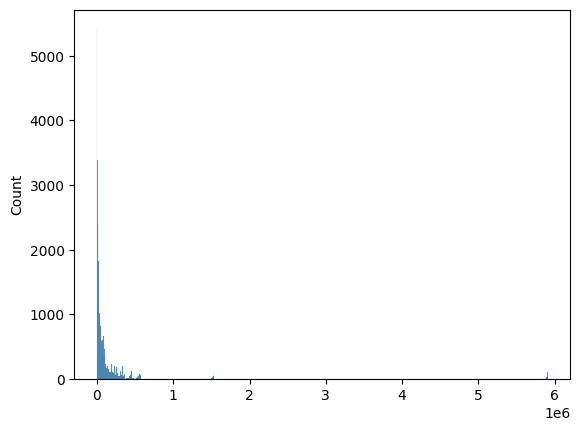

In [5]:
eucl_df = pd.DataFrame(np.zeros((len(shared_region), len(shared_region))), 
                       index = (shared_region), columns=(shared_region)
                      )

for i in shared_region:
    for j in shared_region:
        eucl_df.loc[i,j] = np.linalg.norm(syn_df2.loc[i, '#ppss'] - syn_df2.loc[j, '#ppss'])

v = eucl_df.values.reshape(-1)
v = v[v>0]
print(np.mean(v), np.median(v), np.max(v))

alpha = np.median(v)

sns.histplot(v)

syn_sim = np.e**(-eucl_df/alpha)
syn_sim

In [6]:
region_sim2 = region_sim.loc[shared_region, shared_region].copy()
syn_sim2 = syn_sim.loc[shared_region, shared_region].copy()

In [109]:
cmp_df = pd.DataFrame()
for i in range(0, len(region_sim2)):
    for j in range(0, len(region_sim2)):
        if i < j:
            continue
        cmp_df = pd.concat([cmp_df,
                            pd.DataFrame({'region1': [region_sim2.columns[i]],
                                          'region2': [region_sim2.columns[j]],
                                          'syn_sim': [syn_sim2.iloc[i,j]],
                                          'region_sim': [region_sim2.iloc[i,j]],
                                         })
                           ], axis=0)

cmp_df

,region1,region2,syn_sim,region_sim
0,RSPd,RSPd,1.000000,1.000000
0,BLA,RSPd,0.864977,0.573777
0,BLA,BLA,1.000000,1.000000
0,SSp-tr,RSPd,0.162894,0.807954
0,SSp-tr,BLA,0.188322,0.594014
...,...,...,...,...
0,CU,CA3,0.039464,0.300567
0,CU,AIp,0.013518,0.268478
0,CU,ACAv,0.022017,0.249145
0,CU,VPL,0.453941,0.233370


In [110]:
cmp_df2 = cmp_df[cmp_df['region1'] != cmp_df['region2']].copy()
# cmp_df2['syn_sim'] = np.square((cmp_df2['syn_sim'] - np.min(cmp_df2['syn_sim'])) / (
#     np.max(cmp_df2['syn_sim']) - np.min(cmp_df2['syn_sim'])))
cmp_df2

,region1,region2,syn_sim,region_sim
0,BLA,RSPd,0.864977,0.573777
0,SSp-tr,RSPd,0.162894,0.807954
0,SSp-tr,BLA,0.188322,0.594014
0,VPM,RSPd,0.510455,0.788083
0,VPM,BLA,0.590137,0.477887
...,...,...,...,...
0,CU,GU,0.061547,0.252214
0,CU,CA3,0.039464,0.300567
0,CU,AIp,0.013518,0.268478
0,CU,ACAv,0.022017,0.249145


In [111]:
th = 0.01
if len(cmp_df2[cmp_df2['syn_sim']<th].copy()) / len(cmp_df2.copy()) > 0.1:
    print(True)
    cmp_df2 = cmp_df2[(cmp_df2['syn_sim']>th)&(cmp_df2['syn_sim']<1)].copy()
else:
    print(False)

if len(cmp_df2[cmp_df2['region_sim']<th].copy()) / len(cmp_df2.copy()) > 0.1:
    print(True)
    cmp_df2 = cmp_df2[(cmp_df2['region_sim']>th)&(cmp_df2['region_sim']<1)].copy()
else:
    print(False)

True
False


In [112]:
cmp_df3 = cmp_df2.copy() #.sample(500)

<Axes: xlabel='syn_sim', ylabel='Count'>

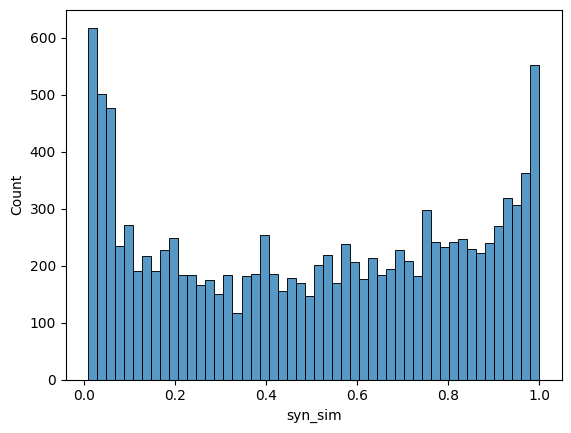

In [113]:
sns.histplot(cmp_df3, bins=50, x='syn_sim')

<Axes: xlabel='region_sim', ylabel='Count'>

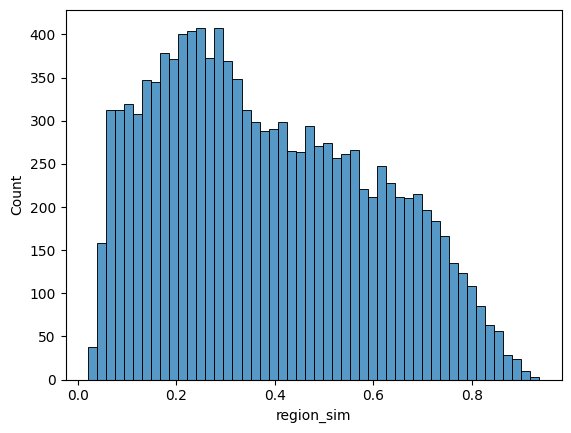

In [114]:
sns.histplot(cmp_df3, bins=50, x='region_sim')

In [115]:
cmp_df3['syn_sim_cat'] = -1
n_bin = 50
for i in list(range(1,n_bin+1))[::-1]:
    cmp_df3.loc[cmp_df3['syn_sim']<=i/n_bin, 'syn_sim_cat'] = i

cmp_df3['region_sim_cat'] = -1
for i in list(range(1,n_bin+1))[::-1]:
    cmp_df3.loc[cmp_df3['region_sim']<=i/n_bin, 'region_sim_cat'] = i

# cmp_df3 = cmp_df3[gene_sim['euc_dis_cat'] != -1].copy()
cmp_df3

,region1,region2,syn_sim,region_sim,syn_sim_cat,region_sim_cat
0,BLA,RSPd,0.864977,0.573777,44,29
0,SSp-tr,RSPd,0.162894,0.807954,9,41
0,SSp-tr,BLA,0.188322,0.594014,10,30
0,VPM,RSPd,0.510455,0.788083,26,40
0,VPM,BLA,0.590137,0.477887,30,24
...,...,...,...,...,...,...
0,CU,GU,0.061547,0.252214,4,13
0,CU,CA3,0.039464,0.300567,2,16
0,CU,AIp,0.013518,0.268478,1,14
0,CU,ACAv,0.022017,0.249145,2,13


In [116]:
cross_df = pd.crosstab(cmp_df3['syn_sim_cat'], cmp_df3['region_sim_cat'])

cross_df2 = pd.DataFrame(np.zeros((n_bin, n_bin)),
                         index=range(1, n_bin+1),
                         columns=range(1, n_bin+1)
                        )
cross_df2.index.name = 'syn_sim_cat'
cross_df2.columns.name = 'region_sim_cat'

for i in cross_df.index:
    for j in cross_df.columns:
        cross_df2.loc[i, j] = cross_df.loc[i, j]

# cross_df = cross_df.iloc[::-1,]
cross_df2

region_sim_cat,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
syn_sim_cat,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,5.0,9.0,6.0,12.0,15.0,18.0,20.0,...,3.0,3.0,2.0,1.0,4.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,3.0,10.0,14.0,10.0,12.0,13.0,16.0,13.0,...,3.0,3.0,5.0,3.0,2.0,2.0,0.0,0.0,0.0,0.0
3,0.0,0.0,8.0,13.0,13.0,15.0,21.0,16.0,19.0,17.0,...,4.0,6.0,5.0,4.0,1.0,1.0,0.0,0.0,0.0,0.0
4,0.0,2.0,7.0,10.0,10.0,12.0,10.0,18.0,11.0,13.0,...,4.0,6.0,4.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,1.0,3.0,1.0,5.0,4.0,6.0,3.0,7.0,...,3.0,1.0,2.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,1.0,8.0,6.0,5.0,7.0,9.0,8.0,14.0,...,2.0,2.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
7,0.0,0.0,2.0,4.0,3.0,3.0,6.0,6.0,4.0,3.0,...,8.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,3.0,3.0,1.0,1.0,5.0,2.0,3.0,...,2.0,1.0,1.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,3.0,6.0,6.0,8.0,4.0,5.0,11.0,7.0,...,5.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [117]:
import numpy as np
import pandas as pd

masked = np.ma.masked_equal(cross_df2.values, 0)

median = np.ma.median(masked)
mad = np.ma.median(np.abs(masked - median))
robust_z = 0.6745 * (masked - median) / mad

thresh = 3.5
mask_np = np.abs(robust_z.filled(np.nan)) > thresh
mask_df = pd.DataFrame(mask_np,
                      index=cross_df2.index,
                      columns=cross_df2.columns)

idx_pairs = mask_df.stack()[mask_df.stack()].index.tolist()

print(len(idx_pairs))

from scipy.ndimage import uniform_filter

mean_8nb = uniform_filter(cross_df2, size=3, mode='mirror') * 9/8 - cross_df2/8

cross_df2[mask_df] = mean_8nb[mask_df]

57


In [118]:
x = cmp_df3['region_sim_cat']
y = n_bin-cmp_df3['syn_sim_cat']

params, covariance = curve_fit(linear_function, x, y)
a, b = params
x_fit = np.linspace(min(x-1), max(x+1), 100)
y_fit = linear_function(x_fit, a, b)
a

0.1753311947369991

In [119]:
from sklearn.linear_model import TheilSenRegressor
xx = cmp_df3['region_sim_cat']
yy = n_bin - cmp_df3['syn_sim_cat']

X = xx.values.reshape(-1,1)
model = TheilSenRegressor(random_state=42).fit(X, yy)
a_ts = model.coef_[0]
b_ts = model.intercept_
xx_fit_z = np.linspace(min(xx-1), max(xx+1), 100)
yy_fit_z = linear_function(xx_fit_z, a_ts, b_ts)
a_ts

0.2914676044875553

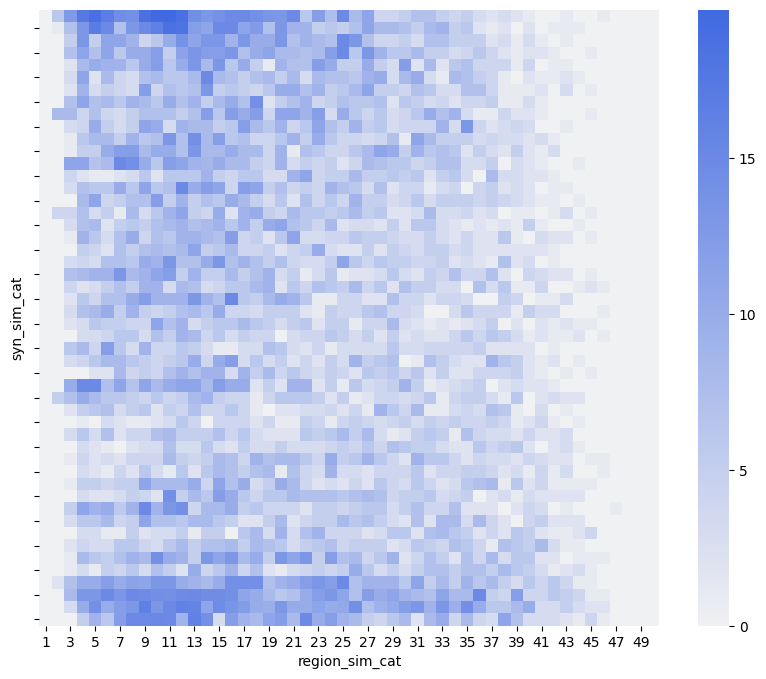

In [120]:
f, ax = plt.subplots(1,1,figsize=(10,8))
sns.heatmap(cross_df2.iloc[::-1, ], 
            cmap=sns.color_palette("light:royalblue", as_cmap=True),
            # mask=cross_df<=0
           )

tick_pos = np.arange(0, n_bin, 2)
plt.xticks(tick_pos+0.5, rotation=0)
plt.yticks(tick_pos+1.5, rotation=0)

cbar = ax.collections[0].colorbar

my_ticks = [0, 5, 10, 15]
cbar.set_ticks(my_ticks)
cbar.set_ticklabels(my_ticks)

# plt.plot(x_fit, y_fit, color='red', 
#          linewidth=2, linestyle='--',
#          label='Fitted Curve')
# plt.plot(xx_fit_z, yy_fit_z, color='green', 
#          linewidth=2, linestyle='--',
#          label='Fitted Curve')
#plt.savefig('./cmp_synaptome_region_sim.png', dpi=400, bbox_inches='tight')
plt.savefig('./ppss_count_ppss.svg', bbox_inches='tight')
plt.show()

<Axes: xlabel='syn_sim', ylabel='region_sim'>

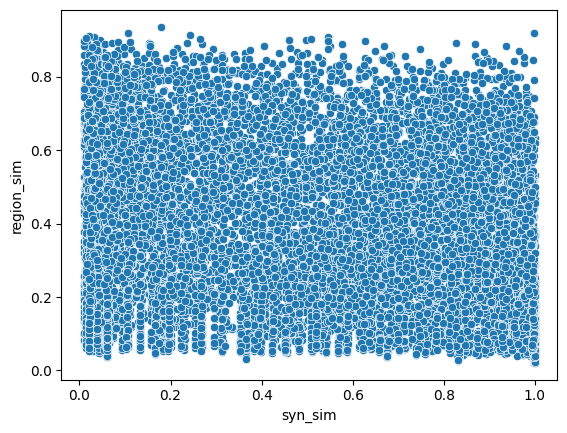

In [121]:
sns.scatterplot(data=cmp_df3, x='syn_sim', y='region_sim')

In [122]:
cmp_df4 = cmp_df3.copy() #[(cmp_df3['region_sim']>=0.16)&(cmp_df3['region_sim']<=1)].copy()
# cmp_df4 = cmp_df3[(cmp_df3['syn_sim']>=0.02)&(cmp_df3['region_sim']>=0.02)].copy()

stats.pearsonr(cmp_df4['syn_sim_cat'], 
               cmp_df4['region_sim_cat'])

PearsonRResult(statistic=-0.11570706973508563, pvalue=5.7514661862963575e-37)

In [123]:
stats.spearmanr(cmp_df4['syn_sim_cat'], 
               cmp_df4['region_sim_cat'])

SignificanceResult(statistic=-0.10952193319263578, pvalue=2.825738726918187e-33)

In [124]:
stats.spearmanr(cmp_df4['syn_sim'], 
               cmp_df4['region_sim'])

SignificanceResult(statistic=-0.11069520626535168, pvalue=5.843666197761806e-34)